<img src='logo_Codsoft.jpg' align='left'>
 <h1> CodSoft : Data Science Internship Tasks </h1>

<h2> Task 2 : MOVIE RATING PREDICTION WITH PYTHON  </h2>
<h4> Target : predict the rating of a movie based on Category , Gender , Age </h4>

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing train_test_split to split the data to features and target
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [3]:
# Reading movies data
df_movies=pd.read_csv('movies.dat',sep="::",encoding='latin1',names=['Movie_ID','Movie_Name','Category'])

In [4]:
df_movies

,Movie_ID,Movie_Name,Category
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [5]:
# Check movies data nulls
df_movies.isnull().sum()

Movie_ID      0
Movie_Name    0
Category      0
dtype: int64

In [6]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Movie_ID    3883 non-null   int64 
 1   Movie_Name  3883 non-null   object
 2   Category    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [7]:
# Get Categories of all movies
movies_category=df_movies.Category.str.get_dummies()
movies_category

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3879,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3880,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3881,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [8]:
df_movies_category=pd.concat([df_movies,movies_category],axis=1)
df_movies_category

,Movie_ID,Movie_Name,Category,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3879,3949,Requiem for a Dream (2000),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3880,3950,Tigerland (2000),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3881,3951,Two Family House (2000),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Reading users data
df_users=pd.read_csv('users.dat',sep="::",names=['User_ID','Gender','Age','Occupation','Zip_code'])

In [10]:
df_users

,User_ID,Gender,Age,Occupation,Zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [11]:
# Check users data nulls
df_users.isnull().sum()

User_ID       0
Gender        0
Age           0
Occupation    0
Zip_code      0
dtype: int64

In [12]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   User_ID     6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip_code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [13]:
df_users[['Age']].describe()

,Age
count,6040.00
mean,30.64
std,12.90
min,1.00
25%,25.00
50%,25.00
75%,35.00
max,56.00


In [14]:
# Reading ratings data
df_rating=pd.read_csv('ratings.dat',sep='::',names=['User_ID','Movie_ID','Rating','Time_Stamp'])

In [15]:
df_rating

,User_ID,Movie_ID,Rating,Time_Stamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [16]:
# Check ratings data nulls
df_rating.isnull().sum()

User_ID       0
Movie_ID      0
Rating        0
Time_Stamp    0
dtype: int64

In [17]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype
---  ------      --------------    -----
 0   User_ID     1000209 non-null  int64
 1   Movie_ID    1000209 non-null  int64
 2   Rating      1000209 non-null  int64
 3   Time_Stamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [18]:
df_rating[['Rating']].describe()

,Rating
count,1000209.00
mean,3.58
std,1.12
min,1.00
25%,3.00
50%,4.00
75%,4.00
max,5.00


In [19]:
# Concat all data together
merged_users_rating=pd.merge(df_users,df_rating,on=['User_ID'])
master_data=pd.merge(df_movies,merged_users_rating,on=['Movie_ID'])

In [20]:
master_data

,Movie_ID,Movie_Name,Category,User_ID,Gender,Age,Occupation,Zip_code,Rating,Time_Stamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,F,1,10,48067,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,F,50,9,55117,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,M,25,12,11413,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,M,25,17,61614,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,F,35,1,95370,5,978226474
...,...,...,...,...,...,...,...,...,...,...
1000204,3952,"Contender, The (2000)",Drama|Thriller,5812,F,25,7,92120,4,992072099
1000205,3952,"Contender, The (2000)",Drama|Thriller,5831,M,25,1,92120,3,986223125
1000206,3952,"Contender, The (2000)",Drama|Thriller,5837,M,25,7,60607,4,1011902656
1000207,3952,"Contender, The (2000)",Drama|Thriller,5927,M,35,14,10003,1,979852537


In [21]:
master_data.isnull().sum()

Movie_ID      0
Movie_Name    0
Category      0
User_ID       0
Gender        0
Age           0
Occupation    0
Zip_code      0
Rating        0
Time_Stamp    0
dtype: int64

In [22]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Movie_ID    1000209 non-null  int64 
 1   Movie_Name  1000209 non-null  object
 2   Category    1000209 non-null  object
 3   User_ID     1000209 non-null  int64 
 4   Gender      1000209 non-null  object
 5   Age         1000209 non-null  int64 
 6   Occupation  1000209 non-null  int64 
 7   Zip_code    1000209 non-null  object
 8   Rating      1000209 non-null  int64 
 9   Time_Stamp  1000209 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


# Visualization

In [23]:
df_users.Age.value_counts()

25    2096
35    1193
18    1103
45     550
50     496
56     380
1      222
Name: Age, dtype: int64

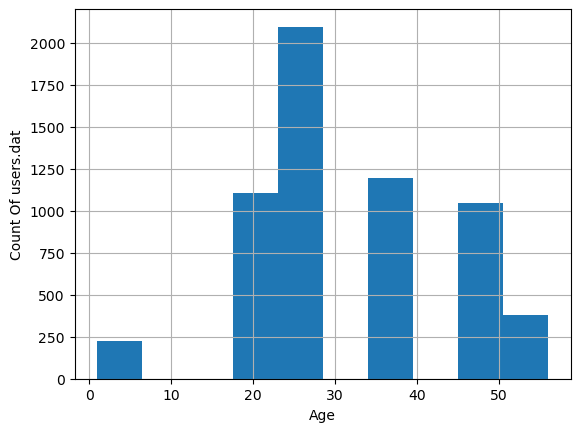

In [24]:
df_users.Age.hist()
plt.xlabel('Age')
plt.ylabel('Count Of users.dat')
plt.show()

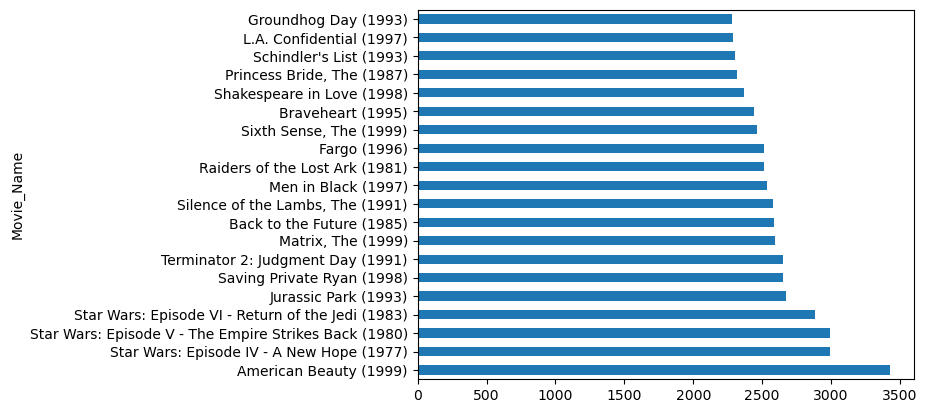

In [25]:
# Top 20 films views
(master_data.groupby("Movie_Name").size().sort_values(ascending=False).head(20)).plot(kind='barh')
plt.show()

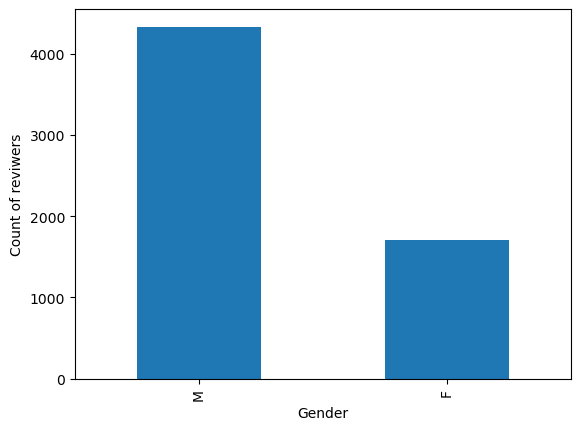

In [26]:
# number of male reviewers vs female reviewers
df_users.Gender.value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count of reviwers')
plt.show()

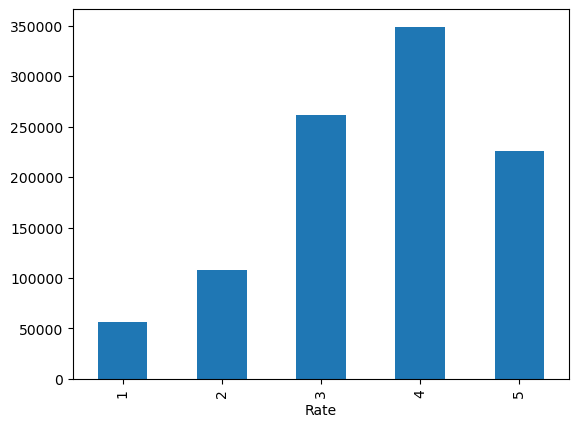

In [27]:
# Count of rates
master_data.Rating.value_counts().sort_index(ascending=True).plot(kind='bar')
plt.xlabel('Rate')
plt.show()

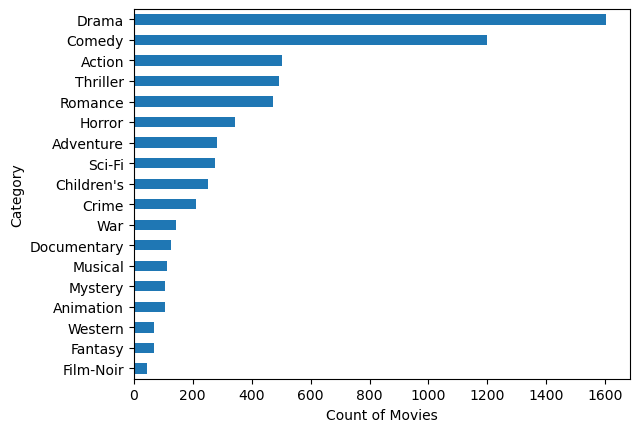

In [28]:
# Count of movies for each category
movies_category.sum().sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Count of Movies')
plt.ylabel('Category')
plt.show()

# 


In [29]:
new_data=pd.merge(df_movies_category,merged_users_rating,on=['Movie_ID'])
new_data.head(10)

,Movie_ID,Movie_Name,Category,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Thriller,War,Western,User_ID,Gender,Age,Occupation,Zip_code,Rating,Time_Stamp
0,1,Toy Story (1995),Animation|Children's|Comedy,0,0,1,1,1,0,0,...,0,0,0,1,F,1,10,48067,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,0,0,1,1,1,0,0,...,0,0,0,6,F,50,9,55117,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,0,0,1,1,1,0,0,...,0,0,0,8,M,25,12,11413,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,0,0,1,1,1,0,0,...,0,0,0,9,M,25,17,61614,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,0,0,1,1,1,0,0,...,0,0,0,10,F,35,1,95370,5,978226474
5,1,Toy Story (1995),Animation|Children's|Comedy,0,0,1,1,1,0,0,...,0,0,0,18,F,18,3,95825,4,978154768
6,1,Toy Story (1995),Animation|Children's|Comedy,0,0,1,1,1,0,0,...,0,0,0,19,M,1,10,48073,5,978555994
7,1,Toy Story (1995),Animation|Children's|Comedy,0,0,1,1,1,0,0,...,0,0,0,21,M,18,16,99353,3,978139347
8,1,Toy Story (1995),Animation|Children's|Comedy,0,0,1,1,1,0,0,...,0,0,0,23,M,35,0,90049,4,978463614
9,1,Toy Story (1995),Animation|Children's|Comedy,0,0,1,1,1,0,0,...,0,0,0,26,M,25,7,23112,3,978130703


In [30]:
new_data.drop(['Movie_ID','Movie_Name','Category','User_ID','Occupation','Zip_code','Time_Stamp'],axis=1,inplace=True)

In [31]:
new_data.head(10)

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Gender,Age,Rating
0,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,F,1,5
1,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,F,50,4
2,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,M,25,4
3,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,M,25,5
4,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,F,35,5
5,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,F,18,4
6,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,M,1,5
7,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,M,18,3
8,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,M,35,4
9,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,M,25,3


In [32]:
# splitting the data to features and labels
features=new_data.drop('Rating',axis=1)
target=new_data.Rating

In [33]:
features

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Gender,Age
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,F,1
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,F,50
2,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,M,25
3,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,M,25
4,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,F,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,F,25
1000205,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,M,25
1000206,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,M,25
1000207,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,M,35


In [34]:
target

0          5
1          4
2          4
3          5
4          5
          ..
1000204    4
1000205    3
1000206    4
1000207    1
1000208    4
Name: Rating, Length: 1000209, dtype: int64

In [35]:
# splitting the data to train and test
features_train,features_test,target_train,target_test=train_test_split(features,target,train_size=0.80)

In [36]:
features_train

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Gender,Age
151678,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,M,18
255671,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,F,25
312909,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,M,56
25792,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,M,45
701940,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,M,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34778,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,M,35
773018,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,M,25
337213,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,M,18
836776,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,M,25


In [37]:
features_test

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Gender,Age
234648,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,M,56
413506,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,F,35
174202,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,F,18
450960,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,F,25
73191,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,M,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329352,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,M,35
504710,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,M,35
367453,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,M,50
168913,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,M,50


In [38]:
target_train

151678    2
255671    3
312909    4
25792     5
701940    4
         ..
34778     5
773018    4
337213    4
836776    5
925860    2
Name: Rating, Length: 800167, dtype: int64

In [39]:
target_test

234648    5
413506    2
174202    5
450960    2
73191     2
         ..
329352    4
504710    2
367453    5
168913    5
74321     5
Name: Rating, Length: 200042, dtype: int64

In [40]:
# Encoding Gender column
features_train=pd.get_dummies(features_train,columns=['Gender'])
features_test=pd.get_dummies(features_test,columns=['Gender'])

In [41]:
features_train

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Age,Gender_F,Gender_M
151678,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,18,0,1
255671,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,25,1,0
312909,1,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,56,0,1
25792,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,45,0,1
701940,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,35,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34778,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,35,0,1
773018,1,0,0,0,0,0,0,1,1,0,...,0,0,1,0,0,0,0,25,0,1
337213,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,18,0,1
836776,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,25,0,1


In [42]:
features_test

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Age,Gender_F,Gender_M
234648,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,56,0,1
413506,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,35,1,0
174202,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,18,1,0
450960,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,25,1,0
73191,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,18,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329352,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,35,0,1
504710,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,35,0,1
367453,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,50,0,1
168913,0,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,50,0,1


In [43]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

# Train the classifier on the training data
tree.fit(features_train, target_train)


DecisionTreeClassifier()

In [44]:
tree.score(features_train,target_train)

0.37017897513893977

In [45]:
tree.score(features_test,target_test)

0.36284880175163214

In [46]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(features_train, target_train)

RandomForestClassifier()

In [47]:
random_forest.score(features_train, target_train)

0.37015023113924966

In [48]:
random_forest.score(features_test,target_test)

0.3629537797062617